In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sympy as sp
import os

# OBTENDO DADOS

In [83]:
df = pd.read_csv('../DataBase.csv')
display(df.head())
display(df.tail())

,date,price,rate
0,2015-07-07,266.2,0.13
1,2015-07-08,268.6,0.13
2,2015-07-09,269.1,0.13
3,2015-07-10,283.6,0.13
4,2015-07-11,292.0,0.13


,date,price,rate
3448,2024-12-14,101417.7,4.64
3449,2024-12-15,104443.0,4.64
3450,2024-12-16,106057.6,4.64
3451,2024-12-17,106138.9,4.64
3452,2024-12-18,100197.8,4.64


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3453 non-null   object 
 1   price   3453 non-null   float64
 2   rate    3453 non-null   float64
dtypes: float64(2), object(1)
memory usage: 81.1+ KB


# TREINO E TESTE

In [85]:
n = 60
df['yn'] = df.price

for i in range(1, n):
    df[f'yn{i}'] = df.price.shift(i)

df.fillna(0, inplace=True)
df

,date,price,rate,yn,yn1,yn2,yn3,yn4,yn5,yn6,...,yn50,yn51,yn52,yn53,yn54,yn55,yn56,yn57,yn58,yn59
0,2015-07-07,266.2,0.13,266.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-07-08,268.6,0.13,268.6,266.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-07-09,269.1,0.13,269.1,268.6,266.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-07-10,283.6,0.13,283.6,269.1,268.6,266.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-07-11,292.0,0.13,292.0,283.6,269.1,268.6,266.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,2024-12-14,101417.7,4.64,101417.7,101426.2,100009.9,101126.2,96600.3,97359.4,101115.8,...,66696.8,68191.5,66663.7,67427.3,67371.3,69030.5,68372.0,68423.1,67418.4,67617.9
3449,2024-12-15,104443.0,4.64,104443.0,101417.7,101426.2,100009.9,101126.2,96600.3,97359.4,...,67086.8,66696.8,68191.5,66663.7,67427.3,67371.3,69030.5,68372.0,68423.1,67418.4
3450,2024-12-16,106057.6,4.64,106057.6,104443.0,101417.7,101426.2,100009.9,101126.2,96600.3,...,68004.6,67086.8,66696.8,68191.5,66663.7,67427.3,67371.3,69030.5,68372.0,68423.1
3451,2024-12-17,106138.9,4.64,106138.9,106057.6,104443.0,101417.7,101426.2,100009.9,101126.2,...,69954.1,68004.6,67086.8,66696.8,68191.5,66663.7,67427.3,67371.3,69030.5,68372.0


In [86]:
def getSecondsArray(dateArray):
    return dateArray.apply(lambda row: row.timestamp())

def getSeconds(days):
    return days * (24*60*60) 


df['date'] = pd.to_datetime(df['date'])
df['date_sec'] = getSecondsArray(df.date)

timeArray = df.date_sec.values
df.head()

,date,price,rate,yn,yn1,yn2,yn3,yn4,yn5,yn6,...,yn51,yn52,yn53,yn54,yn55,yn56,yn57,yn58,yn59,date_sec
0,2015-07-07,266.2,0.13,266.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436227e+09
1,2015-07-08,268.6,0.13,268.6,266.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436314e+09
2,2015-07-09,269.1,0.13,269.1,268.6,266.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436400e+09
3,2015-07-10,283.6,0.13,283.6,269.1,268.6,266.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436486e+09
4,2015-07-11,292.0,0.13,292.0,283.6,269.1,268.6,266.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436573e+09


In [87]:
def getTrainArrays(df):
    xData = df.drop(columns=['date', 'price', 'yn'])
    yData = df.price.values
    return xData, yData

xData, yData = getTrainArrays(df)
xData.head(5)

,rate,yn1,yn2,yn3,yn4,yn5,yn6,yn7,yn8,yn9,...,yn51,yn52,yn53,yn54,yn55,yn56,yn57,yn58,yn59,date_sec
0,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436227e+09
1,0.13,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436314e+09
2,0.13,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436400e+09
3,0.13,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436486e+09
4,0.13,283.6,269.1,268.6,266.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.436573e+09


# MODELO PREDITIVO

In [88]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

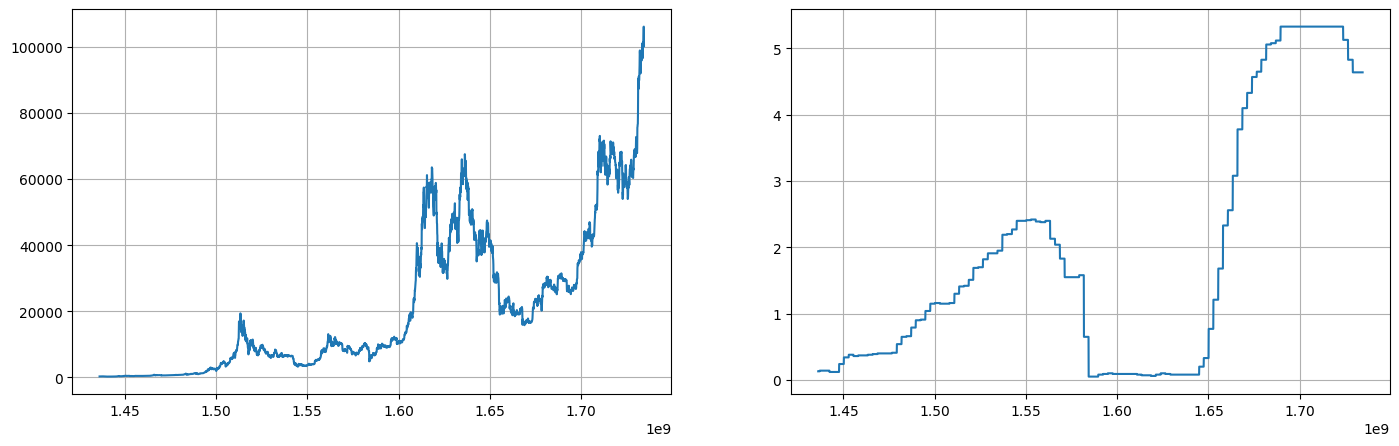

In [89]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(df.date_sec, df.price)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.date_sec, df.rate)
plt.grid()

# MODELO DENSE

Epoch 1/50


c:\Users\march\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0139 - mae: 0.0618 - val_loss: 9.9722e-04 - val_mae: 0.0199
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 9.6769e-04 - mae: 0.0194 - val_loss: 7.1367e-04 - val_mae: 0.0163
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 9.4886e-04 - mae: 0.0184 - val_loss: 6.1033e-04 - val_mae: 0.0147
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0883e-04 - mae: 0.0147 - val_loss: 5.4958e-04 - val_mae: 0.0145
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 7.2274e-04 - mae: 0.0163 - val_loss: 6.2389e-04 - val_mae: 0.0163
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 5.2286e-04 - mae: 0.0139 - val_loss: 7.6622e-04 - val_mae: 0.0184
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 5.9982e-04 - mae: 0.0146 - val_loss: 4.1134e-04 - val_mae: 0.0127
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 6.3284e-04 - mae: 0.0147 - val_loss: 4.7898e-04 - val_mae: 0.0145
Epoch 9/50


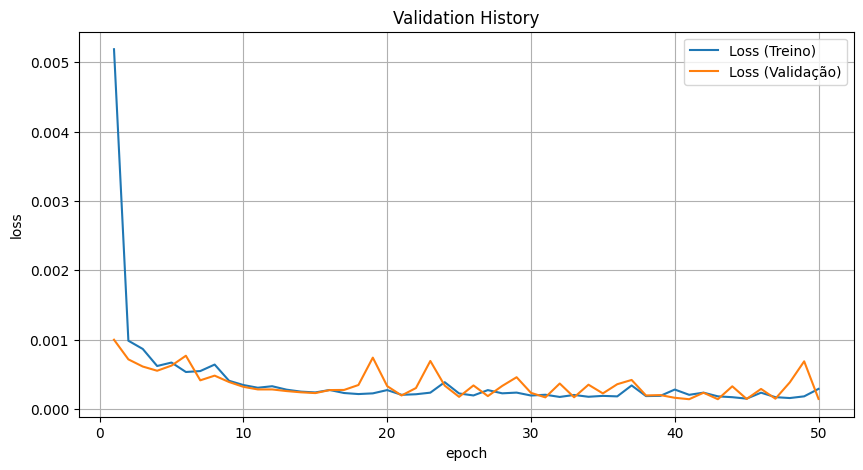

0.00013575825141742826

In [90]:
def getDenseNetwork(xData, yData):
    scalerX = MinMaxScaler()
    scalerY = MinMaxScaler()
    xNormal = scalerX.fit_transform(xData)
    yNormal = scalerY.fit_transform(yData.reshape(-1, 1))
    xTreino, xTeste, yTreino, yTeste = train_test_split(xNormal, yNormal, test_size=0.2)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(xTreino.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Saída com um único valor (preço do Bitcoin)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(xTreino, yTreino, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    loss, mae = model.evaluate(xTeste, yTeste, verbose=0)

    yModel = model.predict(xTeste)
    yModel = scalerY.inverse_transform(yModel)

    return {
        'model'  : model,
        'loss'   : loss, 
        'scalerX': scalerX,
        'scalerY': scalerY,
        'history': history
    }

def plotModel(modelData):
    history = modelData['history']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, label='Loss (Treino)')
    plt.plot(epochs, val_loss, label='Loss (Validação)')
    plt.xlabel('epoch'), plt.ylabel('loss')
    plt.title('Validation History')
    plt.legend(), plt.grid()
    plt.show()


def predictModel(xData, modelData):
    model, scalerX, scalerY = modelData['model'], modelData['scalerX'], modelData['scalerY']
    xNormal = scalerX.transform(xData)
    yPred = model.predict(xNormal)
    yPred = scalerY.inverse_transform(yPred)
    return yPred


modelData = getDenseNetwork(xData, yData)
plotModel(modelData)
modelData['loss']

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step


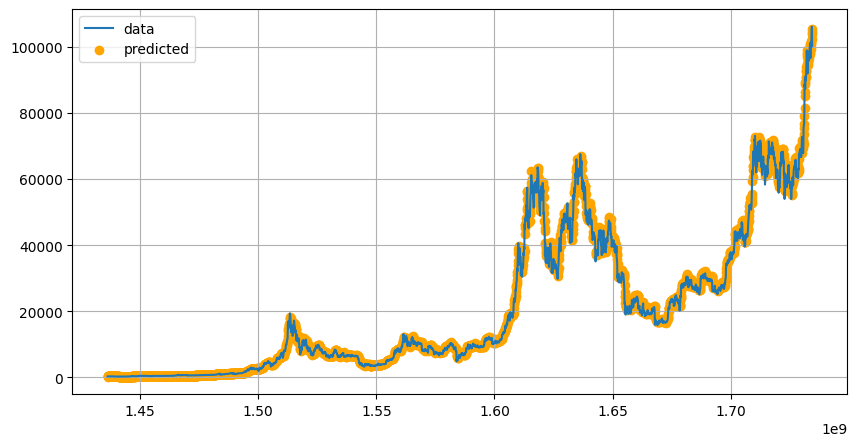

In [91]:
yModel = predictModel(xData, modelData)
plt.figure(figsize=(10, 5))
plt.plot(timeArray, yData, label='data')
plt.scatter(timeArray, yModel, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


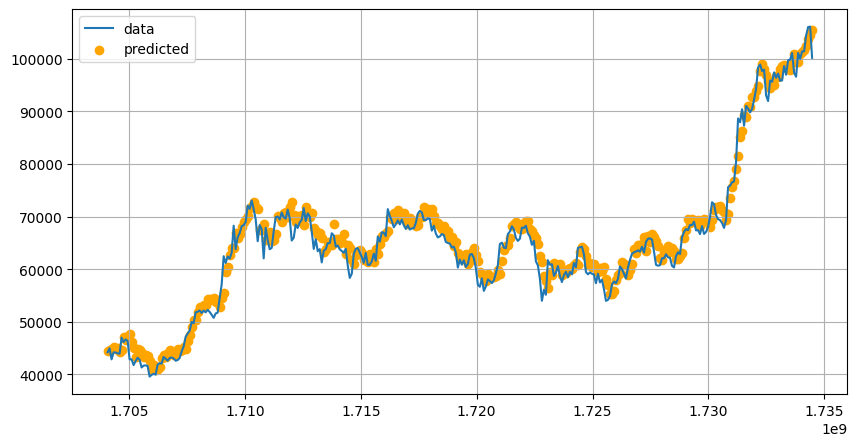

In [92]:
df = df.loc[df.date.dt.year > 2023]
xData, yData = getTrainArrays(df)
yModel = predictModel(xData, modelData)

plt.figure(figsize=(10, 5))
plt.plot(df.date_sec, yData, label='data')
plt.scatter(df.date_sec, yModel, color='orange', label='predicted')
plt.legend(), plt.grid()
plt.show()

In [93]:
def getNewRow(df):
    global n 
    lastRow = df.iloc[-1].copy()
    lastRow['date'] = lastRow.date + pd.Timedelta(days=1)
    lastRow['date_sec'] = lastRow.date.timestamp()

    for i in range(n-1, 1, -1): #yn9 = yn8 ... yn2 = yn1
        lastRow[f'yn{i}'] = lastRow[f'yn{i-1}']

    lastRow['yn1'] = lastRow['yn']
    newRow = pd.DataFrame([lastRow.to_dict()])

    xData, yData = getTrainArrays(newRow)
    predicted = predictModel(xData, modelData)
    newRow['price'] = predicted
    newRow['yn'] = predicted  
    return newRow


for i in range(200): 
    df = pd.concat([df, getNewRow(df)], ignore_index=True)

df.tail(10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━

,date,price,rate,yn,yn1,yn2,yn3,yn4,yn5,yn6,...,yn51,yn52,yn53,yn54,yn55,yn56,yn57,yn58,yn59,date_sec
543,2025-06-27,113902.601562,4.64,113902.601562,113518.898438,114249.695312,114851.835938,114572.109375,114263.875000,114989.023438,...,125135.429688,125291.031250,126551.140625,126708.859375,126147.898438,126295.078125,127334.617188,127138.359375,126791.179688,1.750982e+09
544,2025-06-28,114260.039062,4.64,114260.039062,113902.601562,113518.898438,114249.695312,114851.835938,114572.109375,114263.875000,...,125669.210938,125135.429688,125291.031250,126551.140625,126708.859375,126147.898438,126295.078125,127334.617188,127138.359375,1.751069e+09
545,2025-06-29,113636.804688,4.64,113636.804688,114260.039062,113902.601562,113518.898438,114249.695312,114851.835938,114572.109375,...,125207.625000,125669.210938,125135.429688,125291.031250,126551.140625,126708.859375,126147.898438,126295.078125,127334.617188,1.751155e+09
546,2025-06-30,112762.523438,4.64,112762.523438,113636.804688,114260.039062,113902.601562,113518.898438,114249.695312,114851.835938,...,124481.335938,125207.625000,125669.210938,125135.429688,125291.031250,126551.140625,126708.859375,126147.898438,126295.078125,1.751242e+09
547,2025-07-01,113451.101562,4.64,113451.101562,112762.523438,113636.804688,114260.039062,113902.601562,113518.898438,114249.695312,...,123745.773438,124481.335938,125207.625000,125669.210938,125135.429688,125291.031250,126551.140625,126708.859375,126147.898438,1.751328e+09
548,2025-07-02,113653.507812,4.64,113653.507812,113451.101562,112762.523438,113636.804688,114260.039062,113902.601562,113518.898438,...,125010.984375,123745.773438,124481.335938,125207.625000,125669.210938,125135.429688,125291.031250,126551.140625,126708.859375,1.751414e+09
549,2025-07-03,112822.656250,4.64,112822.656250,113653.507812,113451.101562,112762.523438,113636.804688,114260.039062,113902.601562,...,124458.921875,125010.984375,123745.773438,124481.335938,125207.625000,125669.210938,125135.429688,125291.031250,126551.140625,1.751501e+09
550,2025-07-04,112523.078125,4.64,112523.078125,112822.656250,113653.507812,113451.101562,112762.523438,113636.804688,114260.039062,...,123154.054688,124458.921875,125010.984375,123745.773438,124481.335938,125207.625000,125669.210938,125135.429688,125291.031250,1.751587e+09
551,2025-07-05,112661.843750,4.64,112661.843750,112523.078125,112822.656250,113653.507812,113451.101562,112762.523438,113636.804688,...,123536.648438,123154.054688,124458.921875,125010.984375,123745.773438,124481.335938,125207.625000,125669.210938,125135.429688,1.751674e+09
552,2025-07-06,113263.054688,4.64,113263.054688,112661.843750,112523.078125,112822.656250,113653.507812,113451.101562,112762.523438,...,123572.445312,123536.648438,123154.054688,124458.921875,125010.984375,123745.773438,124481.335938,125207.625000,125669.210938,1.751760e+09


In [94]:
df['pred'] = (df.date.dt.year > 2024)
fig = px.line(df, x='date', y='price', color='pred')
fig.show()